# 1. 数据预处理/划分数据集

In [1]:
import pandas as pd 
import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

# 从excel导入待训练的数据
BIS0_df = pd.read_excel("B0.xlsx", header=None) #无输入时的荧光信号上升
BIS1_df = pd.read_excel("B1.xlsx", header=None) #输入1(SA)
BIS2_df = pd.read_excel("B2.xlsx", header=None) #输入2(KP)
BIS3_df = pd.read_excel("B3.xlsx", header=None) #输入1(SA)+2(KP)
BIS4_df = pd.read_excel("B4.xlsx", header=None) #输入4(AB)
BIS5_df = pd.read_excel("B5.xlsx", header=None) #输入1(SA)+4(AB)
BIS6_df = pd.read_excel("B6.xlsx", header=None) #输入2(KP)+4(AB)
BIS7_df = pd.read_excel("B7.xlsx", header=None) #输入1(SA)+2(KP)+4(AB)

BIS0_data, BIS1_data, BIS2_data, BIS3_data, BIS4_data, BIS5_data, BIS6_data, BIS7_data = [], [], [], [], [], [], [], []

# 用于训练的数据个数
train_n = 300

for i in range(train_n):
    BIS0_data.append(BIS0_df.iloc[:, i])

for i in range(train_n):
    BIS1_data.append(BIS1_df.iloc[:, i])

for i in range(train_n):
    BIS2_data.append(BIS2_df.iloc[:, i])

for i in range(train_n):
    BIS3_data.append(BIS3_df.iloc[:, i])

for i in range(train_n):
    BIS4_data.append(BIS4_df.iloc[:, i])

for i in range(train_n):
    BIS5_data.append(BIS5_df.iloc[:, i])

for i in range(train_n):
    BIS6_data.append(BIS6_df.iloc[:, i])

for i in range(train_n):
    BIS7_data.append(BIS7_df.iloc[:, i])

print("BIS0数据：",len(BIS0_data))
print("BIS1数据：",len(BIS1_data))
print("BIS2数据：",len(BIS2_data))
print("BIS3数据：",len(BIS3_data))
print("BIS4数据：",len(BIS4_data))
print("BIS5数据：",len(BIS5_data))
print("BIS6数据：",len(BIS6_data))
print("BIS7数据：",len(BIS7_data))
print("数据维度：",len(list(BIS0_data[0])), len(list(BIS1_data[0])), len(list(BIS2_data[0])), len(list(BIS3_data[0])), len(list(BIS4_data[0])), len(list(BIS5_data[0])), len(list(BIS6_data[0])), len(list(BIS7_data[0])))

train_data = []
train_label = []
test_data = []
test_label = []

for i in range(0,len(BIS0_data)):
    train_data.append(list(BIS0_data[i]))
    train_label.append(0)

for i in range(0,len(BIS1_data)):
    train_data.append(list(BIS1_data[i]))
    train_label.append(1)

for i in range(0,len(BIS2_data)):
    train_data.append(list(BIS2_data[i]))
    train_label.append(2)

for i in range(0,len(BIS3_data)):
    train_data.append(list(BIS3_data[i]))
    train_label.append(3)

for i in range(0,len(BIS4_data)):
    train_data.append(list(BIS4_data[i]))
    train_label.append(4)

for i in range(0,len(BIS5_data)):
    train_data.append(list(BIS5_data[i]))
    train_label.append(5)

for i in range(0,len(BIS6_data)):
    train_data.append(list(BIS6_data[i]))
    train_label.append(6)

for i in range(0,len(BIS7_data)):
    train_data.append(list(BIS7_data[i]))
    train_label.append(7)

print("训练数据:",len(train_data),train_data)
print("测试数据:",len(test_data),test_data)


BIS0数据： 300
BIS1数据： 300
BIS2数据： 300
BIS3数据： 300
BIS4数据： 300
BIS5数据： 300
BIS6数据： 300
BIS7数据： 300
数据维度： 1 1 1 1 1 1 1 1
训练数据: 2400 [[0.60225], [0.6030969999999998], [0.5973200000000001], [0.5910710000000001], [0.5835869999999999], [0.5795250000000001], [0.594114], [0.5919269999999999], [0.597116], [0.587788], [0.5979669999999999], [0.5952520000000001], [0.6077069999999998], [0.596595], [0.6187210000000001], [0.6004959999999999], [0.6011219999999999], [0.581431], [0.5805640000000001], [0.580586], [0.5801390000000002], [0.6082469999999998], [0.6012419999999998], [0.6051809999999997], [0.5932109999999999], [0.6055270000000001], [0.6078479999999999], [0.607029], [0.6156029999999999], [0.614441], [0.6048729999999998], [0.5897529999999997], [0.5832520000000001], [0.5714780000000002], [0.5828819999999999], [0.5826619999999998], [0.6158819999999998], [0.614924], [0.6228079999999998], [0.6241619999999999], [0.6163049999999999], [0.613907], [0.596767], [0.5986879999999999], [0.595728], [0.59459400

# 2. 数据集拆/RF模型训练/网格搜索最优参数/cv=5/PCA降维可视化

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 将数据分割为训练集和测试集
train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, test_size=0.3, random_state=0)

# 检查训练数据的第一个数据样本的特征数量
feature_count_train = len(train_data[0])

# 检查测试数据的第一个数据样本的特征数量
feature_count_test = len(test_data[0])

print("训练数据的特征数量:", feature_count_train)
print("测试数据的特征数量:", feature_count_test)

print("训练数据:",len(train_data),train_data)
print("测试数据:",len(test_data),test_data)


训练数据的特征数量: 1
测试数据的特征数量: 1
训练数据: 1680 [[37.785225999999994], [62.252196], [51.57995], [63.79056], [0.48058], [68.84301400000001], [11.056932], [17.509475], [29.402671], [5.249222], [11.846626], [51.560123], [9.496961], [17.241775], [9.562971], [0.6312469999999999], [29.38612], [63.666439999999994], [51.823733], [0.4965900000000001], [37.783795999999995], [29.419131000000004], [5.2661169999999995], [0.615286], [29.22362], [51.48421], [18.506743], [39.010256999999996], [29.612258], [29.29634], [62.380185999999995], [63.713409999999996], [0.6158819999999998], [37.585995999999994], [18.672065000000003], [38.488513], [62.697255999999996], [0.609516], [38.803697], [37.474956], [0.47909199999999985], [29.517278], [0.4805379999999999], [18.398233], [68.94800400000001], [68.596754], [51.57677], [62.608366000000004], [37.734096], [69.018254], [51.143514], [29.376398], [62.395815999999996], [0.5792780000000002], [4.583385], [4.589891], [4.5946359999999995], [29.35472], [9.554731], [0.596767], [62.

# 3. 创建SVM分类模型

In [3]:

# 创建SVM分类器
svm = SVC(random_state=0,probability=True)

# 定义要搜索的参数网格
param_grid = {
    'C': [0.1, 1, 10],                      # 惩罚项系数
    'gamma': [0.01, 0.1, 1],                # 核函数系数
    'kernel': ['linear', 'rbf', 'poly']     # 核函数类型
}

# 创建网格搜索对象，使用5折交叉验证评估每个参数组合的性能
grid_search = GridSearchCV(svm, param_grid, cv=5)

# 在整个训练集上进行网格搜索和交叉验证
grid_search.fit(train_data, train_label)

# 输出最佳参数组合
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数进行训练
best_svm = grid_search.best_estimator_

# 在测试集上进行预测
test_score = best_svm.predict_proba(test_data)

# 在训练集上进行预测
train_predictions = best_svm.predict(train_data)

# 在训练集上进行交叉验证
cv_scores = cross_val_score(svm, train_data, train_label, cv=5)

# 打印交叉验证的准确率
print("Cross-Validation Accuracy:", cv_scores.mean())
print("Cross-Validation Accuracy:", cv_scores)


Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Cross-Validation Accuracy: 1.0
Cross-Validation Accuracy: [1. 1. 1. 1. 1.]


# 4. 打印每一个样本的张量、真实标签和预测标签

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印每一个样本的张量、真实标签和预测标签
for i in range(len(test_data)):
    test_predictions = best_svm.predict(test_data)
    sample_tensor = test_data[i]
    true_label = test_label[i]
    predicted_label = test_predictions[i]
    print("Sample Tensor:", sample_tensor)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)


Sample Tensor: [51.38696]
True Label: 6
Predicted Label: 6
Sample Tensor: [0.4883329999999997]
True Label: 0
Predicted Label: 0
Sample Tensor: [50.760034]
True Label: 6
Predicted Label: 6
Sample Tensor: [38.340463]
True Label: 5
Predicted Label: 5
Sample Tensor: [4.527309000000001]
True Label: 1
Predicted Label: 1
Sample Tensor: [18.525553000000002]
True Label: 3
Predicted Label: 3
Sample Tensor: [4.667230999999999]
True Label: 1
Predicted Label: 1
Sample Tensor: [29.13849]
True Label: 4
Predicted Label: 4
Sample Tensor: [51.54333]
True Label: 6
Predicted Label: 6
Sample Tensor: [5.208845999999999]
True Label: 1
Predicted Label: 1
Sample Tensor: [9.577611]
True Label: 2
Predicted Label: 2
Sample Tensor: [18.528903]
True Label: 3
Predicted Label: 3
Sample Tensor: [50.621264]
True Label: 6
Predicted Label: 6
Sample Tensor: [37.565915999999994]
True Label: 5
Predicted Label: 5
Sample Tensor: [17.220195]
True Label: 3
Predicted Label: 3
Sample Tensor: [0.598196]
True Label: 0
Predicted Lab

# 5. 打印报告/绘制数据图

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       208
           2       1.00      1.00      1.00       209
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       216
           5       1.00      1.00      1.00       201
           6       1.00      1.00      1.00       217
           7       1.00      1.00      1.00       216

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

训练集混淆矩阵:
[[212   0   0   0   0   0   0   0]
 [  0 208   0   0   0   0   0   0]
 [  0   0 209   0   0   0   0   0]
 [  0   0   0 201   0   0   0   0]
 [  0   0   0   0 216   0   0   0]
 [  0   0   0   0   0 201   0   0]
 [  0   0   0   0   0   0 217   0]
 [  0   0   0   0   0   0   0 216]]


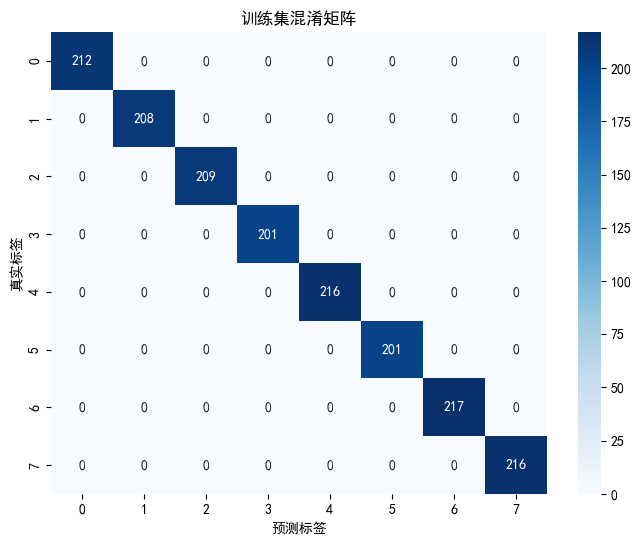

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00        84
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        84

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

测试集准确率: 1.0
测试集精确率: 1.0
测试集召回率: 1.0
测试集F1值: 1.0
测试集混淆矩阵:
[[88  0  0  0  0  0  0  0]
 [ 0 92  0  0  0  0  0  0]
 [ 0  0 91  0  0  0  0  0]
 [ 0  0  0 99  0  0  0  0]
 [ 0  0  0  0 84  0  0  0]
 [ 0  0  0  0  0 99  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 84]]


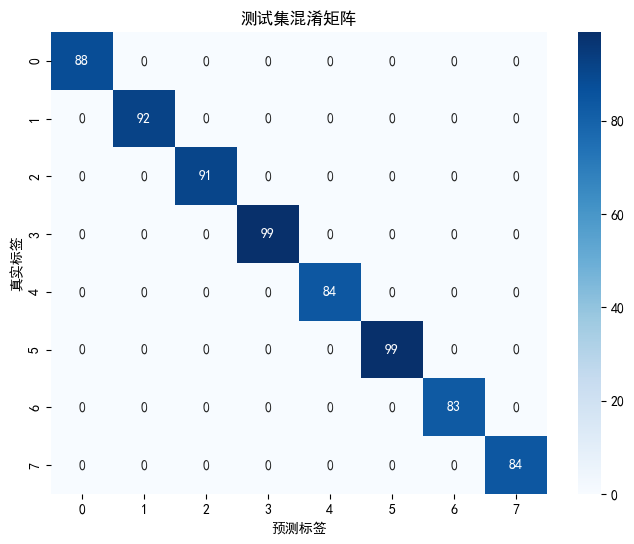

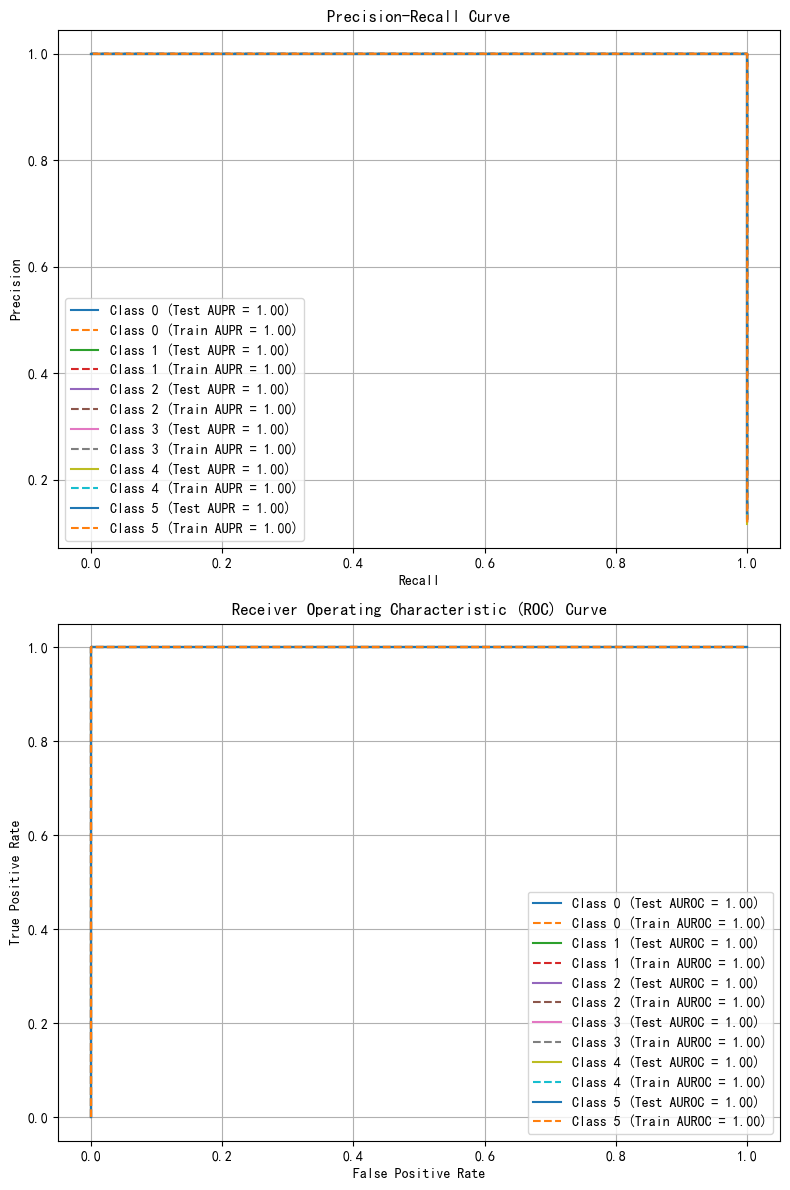

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印训练集的分类报告
train_report = classification_report(train_label, train_predictions)
print("Train Classification Report:")
print(train_report)

# 计算混淆矩阵
train_confu_mat = confusion_matrix(train_label, train_predictions)
print("训练集混淆矩阵:")
print(train_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(train_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("训练集混淆矩阵")
plt.show()



##############################################################

# 对测试集上进行分类预测
test_predictions = best_svm.predict(test_data)

# 打印测试集的分类报告
test_report = classification_report(test_label, test_predictions)
print("Test Classification Report:")
print(test_report)

# 计算准确率
accuracy = accuracy_score(test_label, test_predictions)
print("测试集准确率:", accuracy)

# 计算精确率
precision = precision_score(test_label, test_predictions, average='macro')
print("测试集精确率:", precision)

# 计算召回率
recall = recall_score(test_label, test_predictions, average='macro')
print("测试集召回率:", recall)

# 计算F1值
f1 = f1_score(test_label, test_predictions, average='macro')
print("测试集F1值:", f1)

# 计算混淆矩阵
test_confu_mat = confusion_matrix(test_label, test_predictions)
print("测试集混淆矩阵:")
print(test_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(test_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("测试集混淆矩阵")
plt.show()

####################################################################

from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,precision_recall_curve,auc,roc_curve
import matplotlib.pyplot as plt
# Convert labels to binary format
train_label_bin = label_binarize(train_label, classes=[0, 1, 2, 3, 4, 5])
test_label_bin = label_binarize(test_label, classes=[0, 1, 2, 3, 4, 5])
classes = [0, 1, 2, 3, 4, 5]

# Predict probabilities for each class on the test data
test_score = best_svm.predict_proba(test_data)
train_score = best_svm.predict_proba(train_data)

# Calculate PR and ROC curves for each class
precision = dict()
recall = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()

# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot PR curves
axes[0].set_title('Precision-Recall Curve')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')

# Plot ROC curves
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')

for i in range(len(classes)):
    # Calculate PR curve for test data
    precision[i], recall[i], _ = precision_recall_curve(test_label_bin[:, i], test_score[:, i])
    pr_auc = auc(recall[i], precision[i])

    # Plot PR curve for test data
    axes[0].plot(recall[i], precision[i], label='Class {} (Test AUPR = {:.2f})'.format(classes[i], pr_auc))

    # Calculate PR curve for training data
    train_precision, train_recall, _ = precision_recall_curve(train_label_bin[:, i], train_score[:, i])
    train_pr_auc = auc(train_recall, train_precision)

    # Plot PR curve for training data
    axes[0].plot(train_recall, train_precision, linestyle='--', label='Class {} (Train AUPR = {:.2f})'.format(classes[i], train_pr_auc))

    # Calculate ROC curve for test data
    fpr[i], tpr[i], _ = roc_curve(test_label_bin[:, i], test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for test data
    axes[1].plot(fpr[i], tpr[i], label='Class {} (Test AUROC = {:.2f})'.format(classes[i], roc_auc[i]))

    # Calculate ROC curve for training data
    train_fpr, train_tpr, _ = roc_curve(train_label_bin[:, i], train_score[:, i])
    train_roc_auc = auc(train_fpr, train_tpr)

    # Plot ROC curve for training data
    axes[1].plot(train_fpr, train_tpr, linestyle='--', label='Class {} (Train AUROC = {:.2f})'.format(classes[i], train_roc_auc))

# Add legends and grid
axes[0].legend(loc='lower left')
axes[0].grid(True)
axes[1].legend(loc='lower right')
axes[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

# 6. 数据导出

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Convert labels to binary format
train_label_bin = label_binarize(train_label, classes=[0, 1, 2, 3, 4, 5])
test_label_bin = label_binarize(test_label, classes=[0, 1, 2, 3, 4, 5])
classes = [0, 1, 2, 3, 4, 5]

# Predict probabilities for each class on the test data
test_score = best_svm.predict_proba(test_data)
train_score = best_svm.predict_proba(train_data)

# Calculate PR and ROC curves for each class
precision = dict()
recall = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    # Calculate PR curve for test data
    precision[i], recall[i], thresholds = precision_recall_curve(test_label_bin[:, i], test_score[:, i])
    pr_auc = auc(recall[i], precision[i])

    # Save PR curve data to Excel
    pr_data = {'Recall': recall[i], 'Precision': precision[i], 'Thresholds': np.append(thresholds, 1.0)}
    pr_df = pd.DataFrame(pr_data)
    pr_df.to_excel(f'Test_PR_class_{classes[i]}.xlsx', index=False)

    # Calculate ROC curve for test data
    fpr[i], tpr[i], thresholds = roc_curve(test_label_bin[:, i], test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Save ROC curve data to Excel
    roc_data = {'FPR': fpr[i], 'TPR': tpr[i], 'Thresholds': thresholds}
    roc_df = pd.DataFrame(roc_data)
    roc_df.to_excel(f'Test_ROC_class_{classes[i]}.xlsx', index=False)

    # Calculate PR curve for training data
    train_precision, train_recall, train_thresholds = precision_recall_curve(train_label_bin[:, i], train_score[:, i])
    train_pr_auc = auc(train_recall, train_precision)

    # Save PR curve data to Excel for training data
    train_pr_data = {'Recall': train_recall, 'Precision': train_precision, 'Thresholds': np.append(train_thresholds, 1.0)}
    train_pr_df = pd.DataFrame(train_pr_data)
    train_pr_df.to_excel(f'Train_PR_class_{classes[i]}.xlsx', index=False)

    # Calculate ROC curve for training data
    train_fpr, train_tpr, train_thresholds = roc_curve(train_label_bin[:, i], train_score[:, i])
    train_roc_auc = auc(train_fpr, train_tpr)

    # Save ROC curve data to Excel for training data
    train_roc_data = {'FPR': train_fpr, 'TPR': train_tpr, 'Thresholds': train_thresholds}
    train_roc_df = pd.DataFrame(train_roc_data)
    train_roc_df.to_excel(f'Train_ROC_class_{classes[i]}.xlsx', index=False)



In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# 计算平均精确率 (Average Precision) 和 AUROC
train_average_precision = dict()
train_roc_auc = dict()
test_average_precision = dict()
test_roc_auc = dict()

for i in range(len(classes)):
    # 计算训练集的平均精确率和AUROC
    train_average_precision[i] = average_precision_score(train_label_bin[:, i], train_score[:, i])
    train_roc_auc[i] = roc_auc_score(train_label_bin[:, i], train_score[:, i])

    # 计算测试集的平均精确率和AUROC
    test_average_precision[i] = average_precision_score(test_label_bin[:, i], test_score[:, i])
    test_roc_auc[i] = roc_auc_score(test_label_bin[:, i], test_score[:, i])

# 保存训练集的 AUPR 和 AUROC 到 Excel 文件
train_metrics_data = {'AUPR': list(train_average_precision.values()), 'AUROC': list(train_roc_auc.values())}
train_metrics_df = pd.DataFrame(train_metrics_data)
train_metrics_df.to_excel('Train_AUPR_AUROC.xlsx', index=False)

# 保存测试集的 AUPR 和 AUROC 到 Excel 文件
test_metrics_data = {'AUPR': list(test_average_precision.values()), 'AUROC': list(test_roc_auc.values())}
test_metrics_df = pd.DataFrame(test_metrics_data)
test_metrics_df.to_excel('Test_AUPR_AUROC.xlsx', index=False)


# 7. 真实样本预处理

In [8]:
import pandas as pd

# 读取 Excel 文件
sample_df = pd.read_excel('Bacterial Samples.xlsx', header=None)

# 获取第2行和第361行数据
initial_value = sample_df.iloc[1]  # 第2行，第1行是样本名称
final_value = sample_df.iloc[360]  # 第361行(30 min)

# 进行数据处理，第361行的数据减去第2行的数据
deltaF = final_value - initial_value

# 输入样本数量
sample_n = 20

sample_data = []
sample_label = []

# 添加样本真实标签（与样本数量一致）
labels = [0, 1, 2, 4, 1, 5, 3, 4, 5, 4, 1, 2, 6, 4, 3, 5, 2, 1, 4, 2]

for i in range(sample_n):
    sample_data.append(deltaF.iloc[i])
    sample_label.append(labels[i])

print(sample_data)


[1.3221600000000002, 4.7422439999999995, 10.664459, 26.665303, 3.338979, 40.431795, 20.937151999999998, 28.745519, 38.254295000000006, 28.569570000000002, 5.6275423333333325, 13.78732733333333, 51.855541666666674, 27.032950333333332, 18.985135, 39.818064333333325, 12.517989, 5.401149, 27.504863999999998, 13.056190333333333]


# 8. 使用训练好的SVM对真实样本数据进行分类

Sample Tensor: [1.32216]
True Label: 0
Predicted Label: 0
Sample Tensor: [4.742244]
True Label: 1
Predicted Label: 1
Sample Tensor: [10.664459]
True Label: 2
Predicted Label: 2
Sample Tensor: [26.665303]
True Label: 4
Predicted Label: 4
Sample Tensor: [3.338979]
True Label: 1
Predicted Label: 1
Sample Tensor: [40.431795]
True Label: 5
Predicted Label: 5
Sample Tensor: [20.937152]
True Label: 3
Predicted Label: 3
Sample Tensor: [28.745519]
True Label: 4
Predicted Label: 4
Sample Tensor: [38.254295]
True Label: 5
Predicted Label: 5
Sample Tensor: [28.56957]
True Label: 4
Predicted Label: 4
Sample Tensor: [5.62754233]
True Label: 1
Predicted Label: 1
Sample Tensor: [13.78732733]
True Label: 2
Predicted Label: 2
Sample Tensor: [51.85554167]
True Label: 6
Predicted Label: 6
Sample Tensor: [27.03295033]
True Label: 4
Predicted Label: 4
Sample Tensor: [18.985135]
True Label: 3
Predicted Label: 3
Sample Tensor: [39.81806433]
True Label: 5
Predicted Label: 5
Sample Tensor: [12.517989]
True Labe

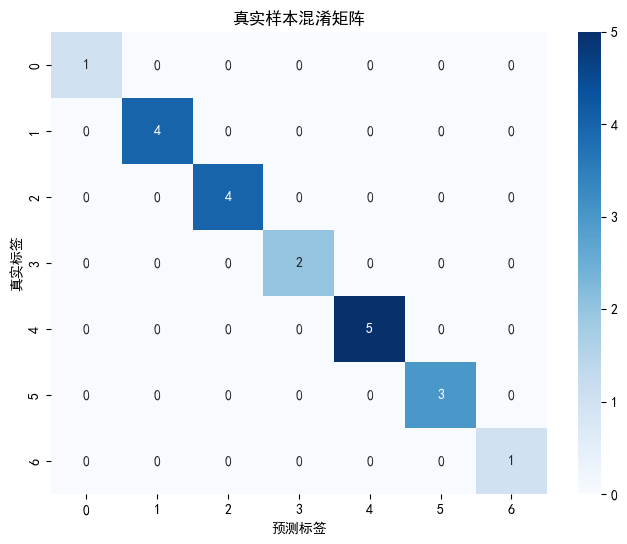

In [9]:
import numpy as np
sample_data_array = np.array(sample_data)
reshaped_data = sample_data_array.reshape(sample_n,1)
#print(reshaped_data)

sample_predictions = best_svm.predict(reshaped_data)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印每一个样本的张量、真实标签和预测标签
for i in range(len(reshaped_data)):
    sample_predictions = best_svm.predict(reshaped_data)
    sample_tensor = reshaped_data[i]
    true_label = sample_label[i]
    predicted_label = sample_predictions[i]
    print("Sample Tensor:", sample_tensor)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)

# 打印真实样本的分类报告
sample_report = classification_report(sample_label, sample_predictions)
print("Samples Classification Report:")
print(sample_report)

# 计算准确率
accuracy = accuracy_score(sample_label, sample_predictions)
print("真实样本准确率:", accuracy)

# 计算精确率
precision = precision_score(sample_label, sample_predictions, average='macro')
print("真实样本精确率:", precision)

# 计算召回率
recall = recall_score(sample_label, sample_predictions, average='macro')
print("真实样本召回率:", recall)

# 计算F1值
f1 = f1_score(sample_label, sample_predictions, average='macro')
print("真实样本F1值:", f1)

# 计算混淆矩阵
sample_confu_mat = confusion_matrix(sample_label, sample_predictions)
print("测试集混淆矩阵:")
print(sample_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(sample_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("真实样本混淆矩阵")
plt.show()
